##CS 185C-02 Final Project
Train and test ML model will predict whether a patient will survive or die based on the following clinical features:

*   age: age of the patient (years)
*   anemia: decrease of red blood cells or hemoglobin (boolean)
*   high blood pressure: if the patient has hypertension (boolean)
*   creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
*   diabetes: if the patient has diabetes (boolean)
*   ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
*   platelets: platelets in the blood (kiloplatelets/mL)
*   sex: woman or man (binary)
*   serum creatinine: level of serum creatinine in the blood (mg/dL)
*   serum sodium: level of serum sodium in the blood (mEq/L)
*   smoking: if the patient smokes or not (boolean)
*   time: follow-up period (days)
*   [target] death event: if the patient deceased during the follow-up period (boolean)












In [33]:
import pandas as pd
patients_df = pd.read_csv("https://www.sjsu.edu/people/wendy.lee/docs/CS185C02-Sp21/heart_disease_clinical_data.csv")
patients_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


###Exploring the Data

In [34]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


From the data above, it is clear that the dataframe is clean, with no null values, and all data is in its respective numeric types (int64 or float64). Thus, at this point, there is no further cleaning necessary. 

In [35]:
patients_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Above, I used the describe() method to get a feel for all the numeric data in the dataset. From the table above, I've understood several things (including but not limited to):
*   It looks like the youngest patient in the dataset has an age of 40 and the oldest patient has an age of 95. The mean age seems to be 60.8 years. 
*   The different columns seem to have different ranges. For instance, `platelets` have numeric values in the 10 thousands while `ejection_fraction` has data in the tens. This has to do with the way these features are measured. 
*   The mean values for column `smoking`, `sex`, and `death_event` help us see the ratio of smokers to non-smokers, females to males, and dead to alive patients in the dataset.



###Task 1: Create and answer at least 5 unique questions using different types of plots to help you understand the data. You can create additional categorical columns or reshape your data to help you understand the data.

####Q1: What is the distribution of all the numeric features in the dataset?

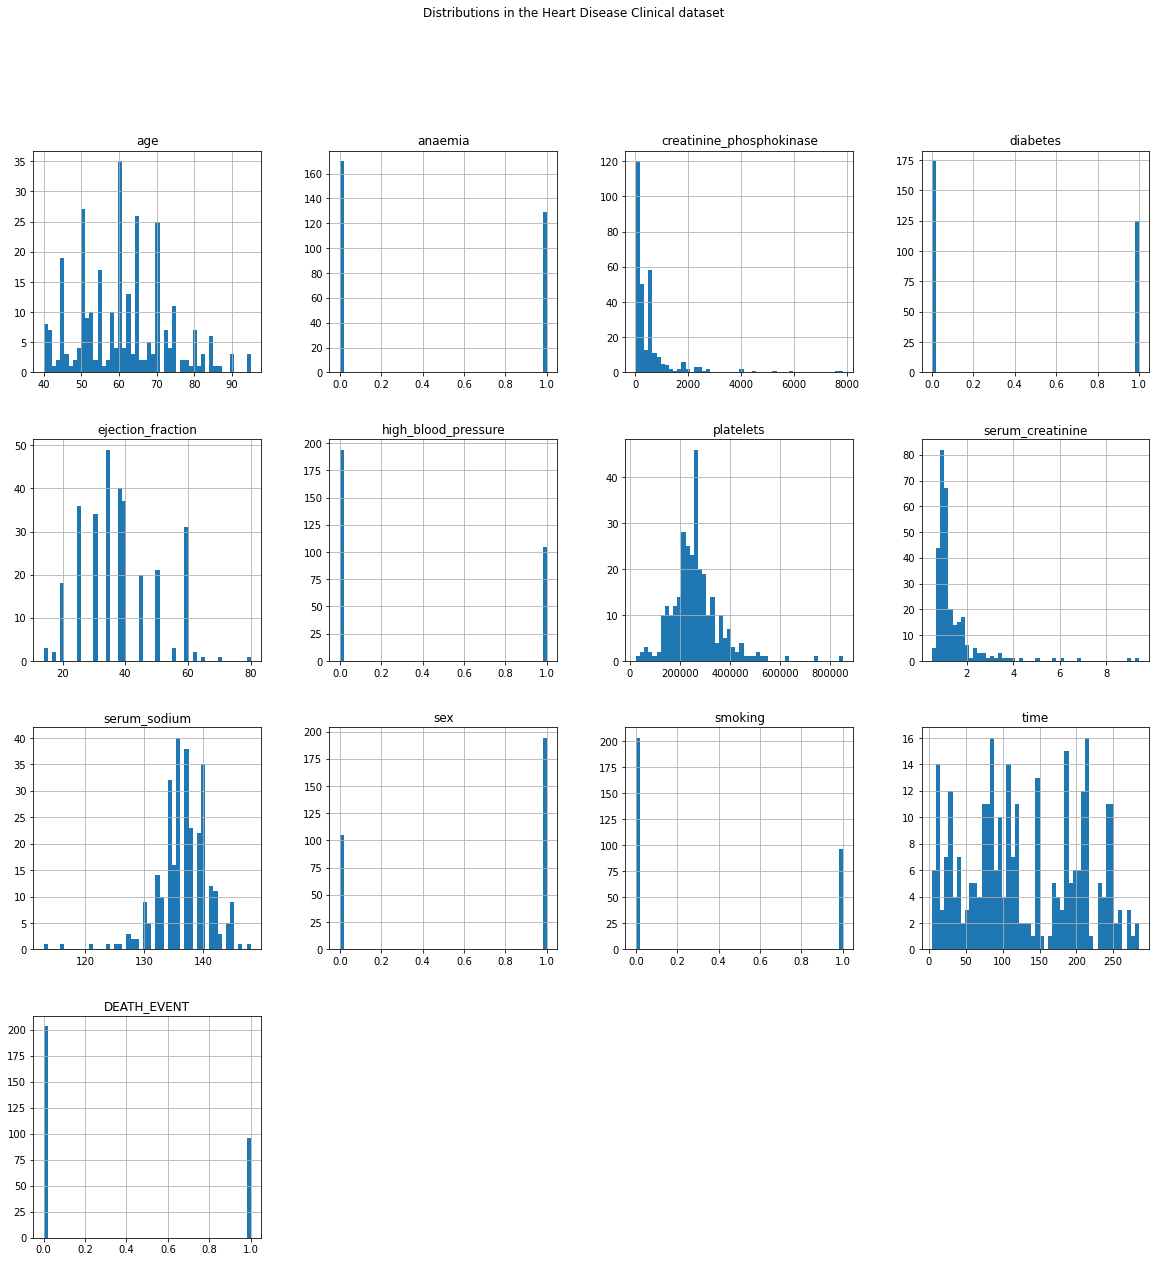

In [36]:
%matplotlib inline 
import matplotlib.pyplot as plt
patients_df.hist(bins=50, figsize=(20, 20))
plt.suptitle("Distributions in the Heart Disease Clinical dataset");
plt.show()

From the distributions above, we can understand that:
1.   Features like `age`, `ejection_fraction`, `platelets` and `serum_sodium` have a "bell-shaped" or even distributions. 
2.   Features like `creatinine_phosphokinase`, `platelets`, `serum_sodium` and `serum_creatinine` have very long tails, meaning they have a couple of extreme values. Later, I will try transforming these attributes to have more bell-shaped distributions. 
3.   Several features have values at either 1 or 0, reflective of their boolean nature. Additionally, lots of the features have very different scales. Later, I will be trying feature scaling.



#### Q2: In the paper associated with this dataset, the researchers found that `serum creatinine` and `ejection fraction` were sufficient to predict the survival of heart failure patients. Let's start by asking the question, what is the relationship between a patient's `serum_creatinine` levels and their `ejection_fraction`?

Text(0.5, 1.0, 'Serum Creatinine vs. Ejection Fraction, marked by patient survival')

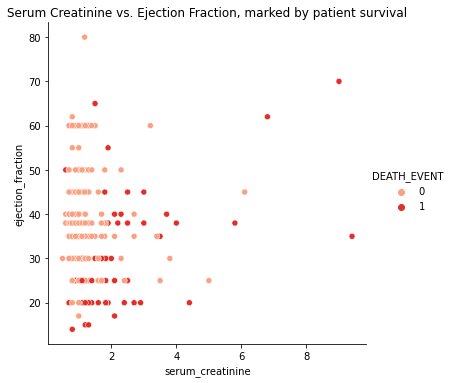

In [37]:
import seaborn as sns
sns.relplot(
    data=patients_df,
    x="serum_creatinine",
    y="ejection_fraction",
    hue="DEATH_EVENT",
    palette="Reds"
)
plt.title("Serum Creatinine vs. Ejection Fraction, marked by patient survival")

While there are a lot of outliers, it looks like most of the patients who survived had a low (<2) `serum_creatinine` level. However, since most of the datapoints for `ejection_fraction` is clustered between 20 to 60, with no discernible pattern, we are going to have to take a closer look. 

Text(0.5, 1.0, 'Serum Creatinine vs. Ejection Fraction, marked by patient survival, where serum creatinine < 4')

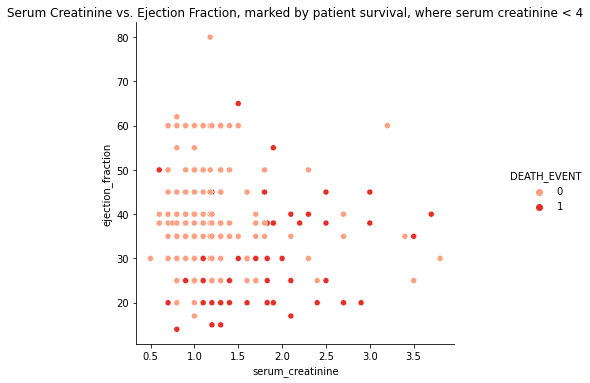

In [38]:
import seaborn as sns
sns.relplot(
    data=patients_df[patients_df["serum_creatinine"] < 4],
    x="serum_creatinine",
    y="ejection_fraction",
    hue="DEATH_EVENT",
    palette="Reds"
)
plt.title("Serum Creatinine vs. Ejection Fraction, marked by patient survival, where serum creatinine < 4")

On closer look, it appears that for the patients who survived, they had an ejection_fraction between 30 to 60. Interestingly, the datapoints for surviving patients seem to be in straight horizontal lines at 30, 38 (approx.), 40, 45 (approx.), 50, and 60. 

####Q3: What is the pairwise relationship between `serum_creatinine` and `ejection_fraction`, and other features?


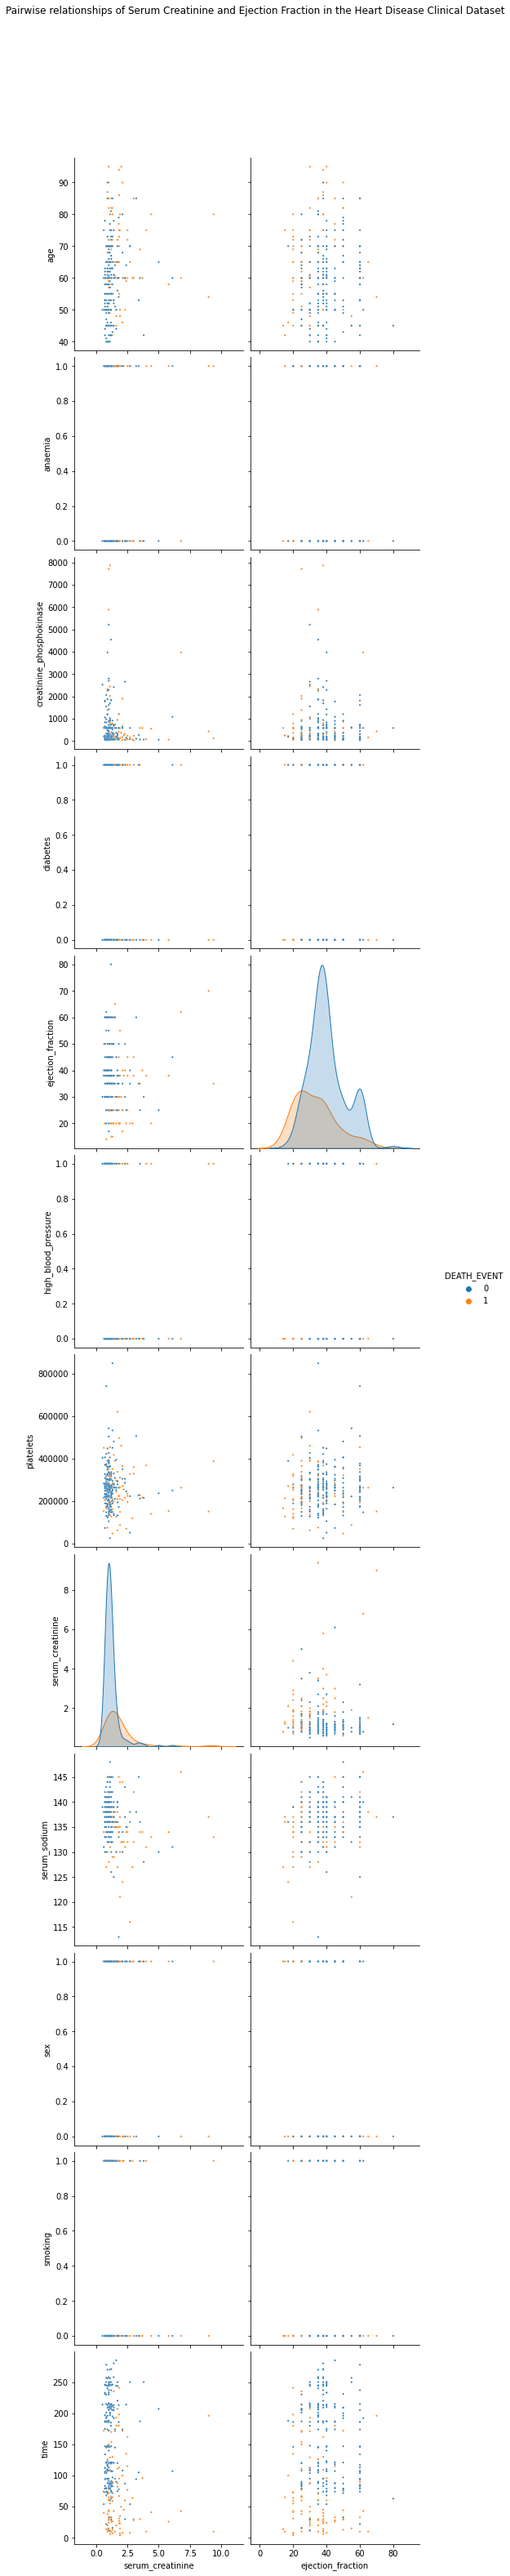

In [39]:
g=sns.pairplot(
    data=patients_df,
    x_vars=['serum_creatinine', 'ejection_fraction'],
    plot_kws={"s":5},
    height=3.5,
    hue="DEATH_EVENT" 
);
g.fig.suptitle(
    "Pairwise relationships of Serum Creatinine and Ejection Fraction in the Heart Disease Clinical Dataset", y=1.05
);

####Q4: Let's examine some other factors. What is the relationship between `smoking` and `ejection_fraction`? How does the patient's `sex` and survival factor into this?

Text(0.5, 1.05, "Smoking vs. Ejection Fraction, split by patient's sex and survival")

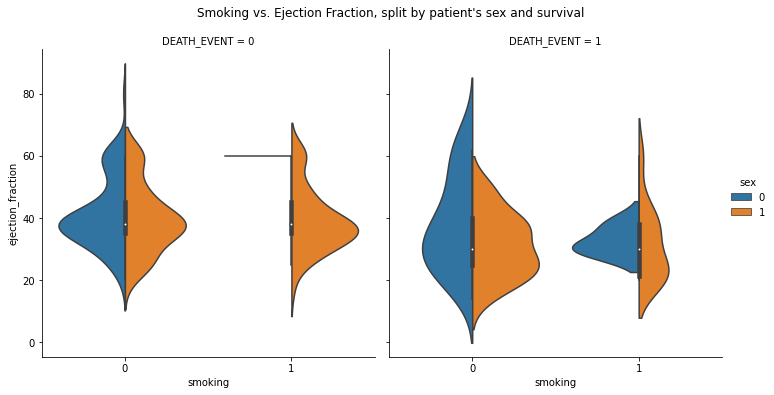

In [40]:
g = sns.catplot(
    data=patients_df,
    x="smoking",
    y="ejection_fraction",
    hue="sex",
    col="DEATH_EVENT",
    split=True,
    kind="violin"
)
g.fig.suptitle("Smoking vs. Ejection Fraction, split by patient's sex and survival", y=1.05)

####Q5: Another feature from that the paper marked out to have a high influence in predicting patient survival is `serum_sodium`. What is the relationship between `serum_sodium` and `high_blood_pressure`? How do these features influence patient survival?




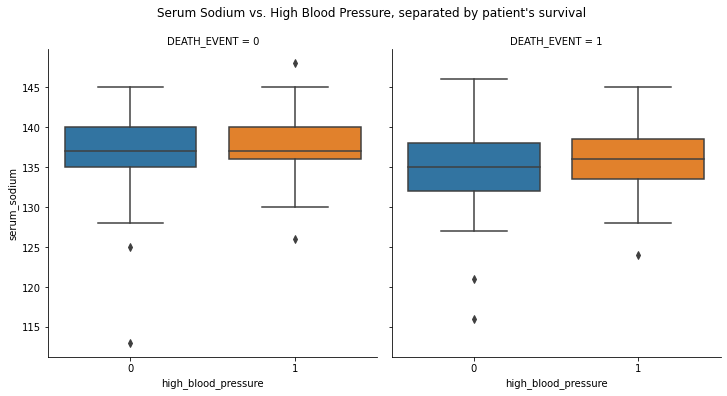

In [41]:
g=sns.catplot(
    data=patients_df,
    x="high_blood_pressure",
    y="serum_sodium",
    kind="box",
    col="DEATH_EVENT"
)
g.fig.suptitle("Serum Sodium vs. High Blood Pressure, separated by patient's survival", y=1.05);

###Task 2: Create a test set and a training set using the original dataset. 

In [42]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(patients_df, test_size=0.2, random_state=42)

Revisiting the distribution plots in Question 1, I've decided to split the data into bins for the training set based on `age`.

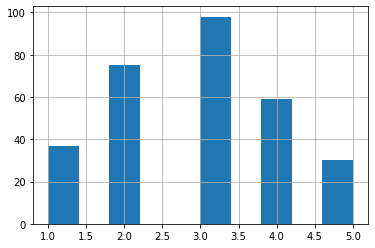

In [43]:
import numpy as np
patients_df["age_cat"] = pd.cut(patients_df["age"],
                       bins=[0, 45, 55, 65, 75, np.inf],
                       labels=[1, 2, 3, 4, 5])

patients_df["age_cat"].hist();

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(patients_df, patients_df["age_cat"]):
    strat_train_set = patients_df.loc[train_index]
    strat_test_set = patients_df.loc[test_index]

In [45]:
def age_cat_proportions(data):
    return data["age_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(patients_df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": age_cat_proportions(patients_df),
    "Stratified": age_cat_proportions(strat_test_set),
    "Random": age_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.123746,0.116667,0.166667,34.684685,-5.720721
2,0.250836,0.250000,0.233333,-6.977778,-0.333333
3,0.327759,0.333333,0.316667,-3.384354,1.700680
4,0.197324,0.200000,0.200000,1.355932,1.355932
5,0.100334,0.100000,0.083333,-16.944444,-0.333333


###Task 3: Follow the steps that we use in Hands-ons 15 and 16 to prepare the data and pipeline for training a few ML classifiers that can predict a binary outcome (survive or dead). Use any strategy that you see fit. Use N-fold cross-validation to evaluate the performance of each classifier.

####Preparing the Data and Pipeline for Training

In [46]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("age_cat", axis=1, inplace=True)

df = strat_train_set.drop("DEATH_EVENT", axis=1)
df_labels = strat_train_set[["DEATH_EVENT"]].copy()
df.reset_index(inplace=True)

In [47]:
df.drop("index", axis=1, inplace=True)

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

df_num_tr = num_pipeline.fit_transform(df)
df_num_tr

array([[ 1.1964085 , -0.84818893,  0.06046278, ..., -1.35839541,
        -0.68283063,  0.9023923 ],
       [-0.65616354, -0.84818893, -0.53883044, ...,  0.73616267,
        -0.68283063, -1.46322339],
       [-1.24561828, -0.84818893, -0.43601052, ..., -1.35839541,
        -0.68283063, -0.45492817],
       ...,
       [ 0.7753694 ,  1.17898261, -0.52707959, ...,  0.73616267,
         1.46449201, -1.04956381],
       [ 0.94378504, -0.84818893, -0.39390332, ..., -1.35839541,
        -0.68283063,  0.92824603],
       [ 0.94378504, -0.84818893, -0.3723601 , ..., -1.35839541,
        -0.68283063, -0.26102525]])

In [49]:
from sklearn.compose import ColumnTransformer
df_num_list = list(df)
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, df_num_list),
    ])

df_prepared = full_pipeline.fit_transform(df)
df_prepared

array([[ 1.1964085 , -0.84818893,  0.06046278, ..., -1.35839541,
        -0.68283063,  0.9023923 ],
       [-0.65616354, -0.84818893, -0.53883044, ...,  0.73616267,
        -0.68283063, -1.46322339],
       [-1.24561828, -0.84818893, -0.43601052, ..., -1.35839541,
        -0.68283063, -0.45492817],
       ...,
       [ 0.7753694 ,  1.17898261, -0.52707959, ...,  0.73616267,
         1.46449201, -1.04956381],
       [ 0.94378504, -0.84818893, -0.39390332, ..., -1.35839541,
        -0.68283063,  0.92824603],
       [ 0.94378504, -0.84818893, -0.3723601 , ..., -1.35839541,
        -0.68283063, -0.26102525]])

In [50]:
cols = list(df)
new_df = pd.DataFrame(df_prepared, columns=cols)
new_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.196408,-0.848189,0.060463,1.178983,1.857386,-0.736163,0.005445,0.010186,-2.774396,-1.358395,-0.682831,0.902392
1,-0.656164,-0.848189,-0.538830,1.178983,1.857386,-0.736163,1.060593,-0.547342,-0.407941,0.736163,-0.682831,-1.463223
2,-1.245618,-0.848189,-0.436011,1.178983,-1.831185,1.358395,0.066910,0.660636,-3.011042,-1.358395,-0.682831,-0.454928
3,-0.066709,-0.848189,-0.352775,-0.848189,-0.287132,-0.736163,0.148863,0.288950,0.775286,0.736163,-0.682831,1.484101
4,0.354330,-0.848189,-0.508474,1.178983,0.999579,1.358395,-0.783356,-0.361499,0.775286,0.736163,-0.682831,-1.372735


####Model #1: Decision Tree Classifiers

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


tree_class = DecisionTreeClassifier(random_state=42)
tree_class.fit(df_prepared, df_labels)

tree_scores = cross_val_score(tree_class, df_prepared, df_labels, 
                        scoring="accuracy", cv=5)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_scores)

Scores: [0.6875     0.75       0.83333333 0.8125     0.78723404]
Mean: 0.774113475177305
Standard deviation: 0.051450986275609546


#### Model 2: KNeighbors Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier

kn_class = KNeighborsClassifier(n_neighbors=10)
kn_class.fit(df_prepared, df_labels.values.ravel())
df_predictions = kn_class.predict(df_prepared)

kn_scores = cross_val_score(kn_class, df_prepared, df_labels.values.ravel(), 
                        scoring="accuracy", cv=10)
display_scores(kn_scores)

Scores: [0.75       0.75       0.79166667 0.70833333 0.79166667 0.79166667
 0.70833333 0.75       0.66666667 0.69565217]
Mean: 0.7403985507246377
Standard deviation: 0.04202000466266574


#### Model 3: Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

forest_class = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=2)
forest_class.fit(df_prepared, df_labels.values.ravel())
scores = cross_val_score(forest_class, df_prepared, df_labels.values.ravel(), cv=5)
display_scores(scores)

Scores: [0.89583333 0.77083333 0.89583333 0.89583333 0.78723404]
Mean: 0.849113475177305
Standard deviation: 0.05745446932546284


####Model 4: MLP (Neural Network) Classifier

In [54]:
from sklearn.neural_network import MLPClassifier
mlp_class = MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=0)
mlp_class.fit(df_prepared, df_labels.values.ravel())
svm_scores = cross_val_score(mlp_class, df_prepared, df_labels.values.ravel(), cv=10)
display_scores(svm_scores)

Scores: [0.75       0.70833333 0.58333333 0.75       0.91666667 0.625
 0.79166667 0.75       0.70833333 0.69565217]
Mean: 0.7278985507246377
Standard deviation: 0.08628895322609541


Conclusions: Based on the four models above, it's clear that the Random Forest Classifier Model has the lowest standard deviation (error) of 0.06 and the highest mean of 0.85. As such, I will be using this model to finetune my dataset. 

####Finetuning Random Forest Classifier Model Using Randomized Search CV

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_class = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(forest_class, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', 
                                random_state=42)
rnd_search.fit(df_prepared, df_labels.values.ravel())

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [56]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8241134751773049 {'max_features': 7, 'n_estimators': 180}
0.8117021276595745 {'max_features': 5, 'n_estimators': 15}
0.8407801418439715 {'max_features': 3, 'n_estimators': 72}
0.8283687943262411 {'max_features': 5, 'n_estimators': 21}
0.8199468085106384 {'max_features': 7, 'n_estimators': 122}
0.8282801418439716 {'max_features': 3, 'n_estimators': 75}
0.8324468085106383 {'max_features': 3, 'n_estimators': 88}
0.8199468085106384 {'max_features': 5, 'n_estimators': 100}
0.8407801418439715 {'max_features': 3, 'n_estimators': 150}
0.7655141843971631 {'max_features': 5, 'n_estimators': 2}


In [57]:
print(rnd_search.best_params_)
rnd_search.best_estimator_

{'max_features': 3, 'n_estimators': 72}


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=72,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [58]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([0.10063931, 0.01341256, 0.08107674, 0.00820659, 0.13127172,
       0.01408146, 0.08121334, 0.1395392 , 0.07621034, 0.01343429,
       0.01016413, 0.33075033])

In [59]:
attributes = df_num_list
sorted(zip(feature_importances, attributes), reverse=True)

[(0.33075032746169175, 'time'),
 (0.1395392008018179, 'serum_creatinine'),
 (0.13127171795582865, 'ejection_fraction'),
 (0.10063930838734868, 'age'),
 (0.08121334287756203, 'platelets'),
 (0.08107673553326242, 'creatinine_phosphokinase'),
 (0.07621034049885239, 'serum_sodium'),
 (0.014081459893256888, 'high_blood_pressure'),
 (0.013434286777202046, 'sex'),
 (0.013412563669115436, 'anaemia'),
 (0.010164130939586999, 'smoking'),
 (0.00820658520447469, 'diabetes')]

In [60]:
from sklearn.metrics import accuracy_score
final_model = rnd_search.best_estimator_

X_test = strat_test_set.drop("DEATH_EVENT", axis=1)
y_test = strat_test_set["DEATH_EVENT"].copy()
X_test.reset_index(inplace=True)

X_test.drop("index", axis=1, inplace=True)
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_as = accuracy_score(y_test, final_predictions)
final_as

0.8666666666666667

Finetuning the Random Forests Classifier Model using the Randomized Search CV resulted in a accuracy score of 0.87

### Task 4: Create a ROC plot that shows all the trained ML classifier's performance. Select the best one for testing.

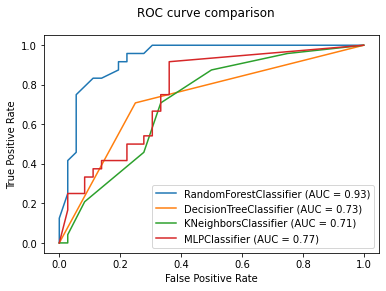

In [61]:
from sklearn import metrics
from sklearn.metrics import plot_roc_curve

rft_disp = plot_roc_curve(final_model, X_test_prepared, y_test)
dtc_disp = plot_roc_curve(tree_class, X_test_prepared, y_test, ax=rft_disp.ax_)
kneigh_disp = plot_roc_curve(kn_class, X_test_prepared, y_test, ax=rft_disp.ax_)
mlp_disp = plot_roc_curve(mlp_class, X_test_prepared, y_test, ax=rft_disp.ax_)

rft_disp.figure_.suptitle("ROC curve comparison")
plt.show()

I decided to also plot a Precision Recall Curve for all the Models, since some data scientists, believe it to be a more accurate measure and comparison of the different models.

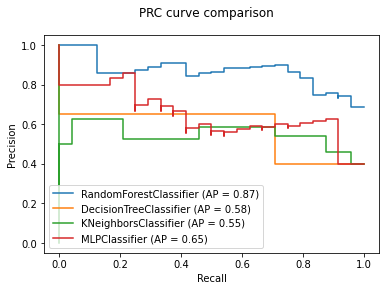

In [62]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

rft_disp = plot_precision_recall_curve(final_model, X_test_prepared, y_test)
dtc_disp = plot_precision_recall_curve(tree_class, X_test_prepared, y_test, ax=rft_disp.ax_)
kneigh_disp = plot_precision_recall_curve(kn_class, X_test_prepared, y_test, ax=rft_disp.ax_)
mlp_disp = plot_precision_recall_curve(mlp_class, X_test_prepared, y_test, ax=rft_disp.ax_)

rft_disp.figure_.suptitle("PRC curve comparison")
plt.show()

###Task 5: Test your best ML classifier using the test set.

Confusion Matrix:
[[34  2]
 [ 6 18]]


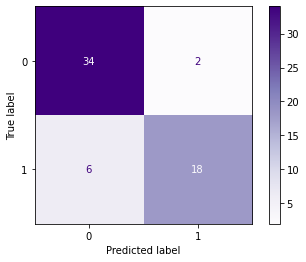

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        36
           1       0.90      0.75      0.82        24

    accuracy                           0.87        60
   macro avg       0.88      0.85      0.86        60
weighted avg       0.87      0.87      0.86        60



In [63]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, final_predictions, labels=[0,1]))
plot_confusion_matrix(final_model, X_test_prepared, y_test, cmap="Purples", values_format='.0f')
plt.show()

print(metrics.classification_report(y_test, final_predictions, labels=[0,1]))